Random Forest is a machine learning algorithm used for both classification and regression problem

we use ensemble learning technique which means it combine multiple models to improve their performance , instead of just relying on one single decision tree


In [ ]:
# step 1:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
churn_data= pd.read_csv('/content/customer_churn (3).csv')

In [ ]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# eda :

churn_data.shape

(7043, 21)

In [ ]:
#  information

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# monthlycharges -
churn_data['MonthlyCharges'].value_counts()

,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
56.85,1
101.70,1
48.40,1


In [ ]:
churn_data['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
# convert it into null nd then remove it
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors ='coerce')


# error =corece -? any invaliad values will be converted into nan(null)

# if youhave categorcal -


In [ ]:
churn_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
churn_data=churn_data.dropna()

In [ ]:
churn_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
churn_data.duplicated().sum()

np.int64(0)

In [ ]:
churn_data.shape

(7032, 21)

In [ ]:
churn_data  # 2 mins

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
churn_data.drop(columns =['customerID'], inplace = True)



/tmp/ipython-input-3155920368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data.drop(columns =['customerID'], inplace = True)


In [ ]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# encoding:
# ml models work wih numeric data only . not text

# so we need to convert it into numbers
# this process is called encoding


#types of encoding:

# 1.  label encoding:  each category is replaced by a number

#2. one hot encoding:  create a new columns for each category with 1 or 0

# 3. ordinal encoding:  when categories have a natural order



In [ ]:

# step 1:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# step 2:
le = LabelEncoder()

In [ ]:
# step 3:
col_list = []

for i in churn_data.columns:
  if ((churn_data[i].dtypes =='object')& (i != 'Churn')):
    col_list.append(i)


In [ ]:
col_list

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
for i in col_list:
  churn_data[i] = le.fit_transform(churn_data[i])

/tmp/ipython-input-408786953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data[i] = le.fit_transform(churn_data[i])
/tmp/ipython-input-408786953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data[i] = le.fit_transform(churn_data[i])
/tmp/ipython-input-408786953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [ ]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,Yes


In [ ]:
# stand /normalized not required but encoding is generally required if you have data like male , female

In [ ]:
# dividing into independent and dependent

X = churn_data.iloc[: , :-1] # independent columns
#[ row index: row , column: column index]
y = churn_data['Churn']

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
# splitting the data into train, test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

# stratify means keep the same proportion of classes in both the training and testing data




In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier1 = RandomForestClassifier(n_estimators= 100)

In [ ]:
classifier1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = classifier1.predict(X_test)

In [ ]:
y_pred

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.7860696517412935

In [ ]:
# n_estimators -> defines how any decision we want

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_pred, y_test)

cm

array([[925, 193],
       [108, 181]])

In [ ]:
n = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

accuracy = []
for i in n:
  model = RandomForestClassifier(n_estimators= i, random_state = 42)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  a = accuracy_score(y_test, y_pred)*100

  accuracy.append(a)



In [ ]:
d = {'number of tree': n,
     "accuracy score": accuracy}

df = pd.DataFrame(d)
df

,number of tree,accuracy score
0,100,78.606965
1,200,78.606965
2,300,78.606965
3,400,78.606965
4,500,78.606965
5,600,78.606965
6,700,78.606965
7,800,78.606965
8,900,78.606965
9,1000,78.606965


In [ ]:
# hyperparameter tuning:;


#hyperparameter tuning refers to the process of selexting optimal values for the
# different parameter of a machine learning


#gridsearch cv #: tking all possible combination of the parameter
# randomized cv : selecting random parameter


# n_estimator : number of tree in a forest

#max_depth : the max depth of each decision tree

# min_sample_split :  min no of sample required to split a node

# min_sample_leaf : min n of sample required to be at leave node

# max_feature -> the number of features to consider while looking at best split

#"sqrt":
#log2  =


# bootstrap : true , false

# criterion : gini r entropy



# drop --- > tommorow from this point

# boostrap aggregration is a method where multiple models are trained on different
# random subsets of the trainng data using boostrap == sampling with replacement

# their predictions are then combined to produce more accurate result


In [ ]:
# grid cv:

# step1
from sklearn.model_selection import GridSearchCV

In [ ]:
# step2
param_grid ={
    'n_estimators': [100,200, 300],
    'max_depth': [None,5,10],
    'min_samples_leaf':[1,2, 4],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [ ]:
 #step3
classifier1 = RandomForestClassifier(random_state = 42)

In [ ]:
grid_search = GridSearchCV(estimator= classifier1, param_grid = param_grid, cv = 2)

# cv - cross validation


In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]})

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classfier3 = RandomForestClassifier(n_estimators= 300, criterion='gini',max_depth=10, min_samples_leaf= 7,bootstrap=True, random_state=50)


In [ ]:
classfier3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=7, n_estimators=300,
                       random_state=50)

In [ ]:
y_pred1 = classfier3.predict(X_test)

In [ ]:
accuracy_score(y_pred1, y_test)

0.7931769722814499

In [ ]:
#oob (out of bag)
#  it is way to chcek the performance of the random forest model without using  a separate validation test
# step1 : 5 mins

y = churn_data['Churn']
X1 = churn_data.iloc[:, :-1]

In [ ]:
X1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
# step2 :
oobclassfier = RandomForestClassifier(n_estimators = 800, oob_score = True, random_state =42)

In [ ]:
oobclassfier.fit(X1, y)

RandomForestClassifier(n_estimators=800, oob_score=True, random_state=42)

In [ ]:
# step4:

oob_data_indices = np.where(oobclassfier.oob_decision_function_[:,1]>= 0.5)

In [ ]:
oob_dataset = X1.iloc[oob_data_indices]
oob_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,0,1,1,0,1,1,2,1,0,0,0,0,0,0,0,1,2,74.45,74.45
7018,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,3,70.65,70.65
7029,0,1,0,0,6,0,1,0,0,0,0,0,2,2,0,1,2,44.40,263.05
7032,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75


In [ ]:
print(oobclassfier.oob_score_)

0.7919510807736063


In [ ]:
oob_probs = pd.DataFrame(
    oobclassfier.oob_decision_function_,
    columns=oobclassfier.classes_
)

oob_probs

,No,Yes
0,0.329073,0.670927
1,0.989726,0.010274
2,0.517361,0.482639
3,0.954064,0.045936
4,0.275510,0.724490
...,...,...
7027,0.886288,0.113712
7028,0.778571,0.221429
7029,0.779720,0.220280
7030,0.254181,0.745819


In [ ]:
# roc and auc

# it will give probability

# whther 0.3 means no and 0.9 means  yes
# roc and auc

# reciever operating characteristics:

# roc : is test of different cutoff points(thresholds)

# a graph that show how well the model separeted yes r no accross all teh threshod values


#  x- false positive rate
# y - true postive rate  (sensitivity)out of all actual psotive , how many did the model correctly
# indentify as postive

#specificity :  true negative rate -> out  of all actual negative , how many did the model correctly indetify as negative


# roc tells , if i change my cutoff , how good is my model at catching postive value without catching too
# many false values




In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
y_pred_prob = classfier3.predict_proba(X_test)[:,-1]

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print("auc score", auc_score)

auc score 0.834924755786324


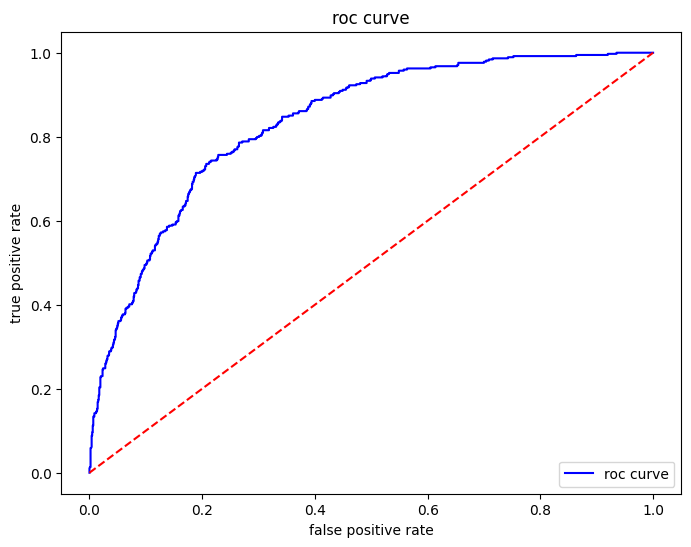

In [ ]:
# roc curve
fpr, tpr,thresholds = roc_curve(y_test , y_pred_prob, pos_label="Yes")
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color ='blue', label ='roc curve')
plt.plot([0,1],[0,1], color='red', linestyle ='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc curve')
plt.legend(loc='lower right')
plt.show()